In [1]:
# Select algorithm to use as machine learner
# 0 = Linear Regression
# 1 = SVR  (not recommended - too slow)
# 2 = Decision Tree
# 3 = Random Forest
# 4 = XGBoost

algorithm_choice = 3

#Check a valid choice of algorithm has been made
assert algorithm_choice in [0,1,2,3,4]

In [2]:
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import numpy as np
from nltk.stem import *

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

print "Import successful"

Import successful


In [3]:
try:
    data = pd.read_csv("train.csv")
    
    print "Quora duplicate questions training dataset has {} samples with {} features each.".format(*data.shape)
    
except:
    print "Dataset(s) could not be loaded. Please check filename is correct and dataset exists"

Quora duplicate questions training dataset has 404290 samples with 6 features each.


In [4]:
print "Display sample of training data:"
display(data.head(10))

Display sample of training data:


,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0


In [5]:
print "Display statistics about training data:"
display(data.describe())

Display statistics about training data:


,id,qid1,qid2,is_duplicate
count,404290.000000,404290.000000,404290.000000,404290.000000
mean,202144.500000,217243.942418,220955.655337,0.369198
std,116708.614502,157751.700002,159903.182629,0.482588
min,0.000000,1.000000,2.000000,0.000000
25%,101072.250000,74437.500000,74727.000000,0.000000
50%,202144.500000,192182.000000,197052.000000,0.000000
75%,303216.750000,346573.500000,354692.500000,1.000000
max,404289.000000,537932.000000,537933.000000,1.000000


In [6]:
#question ids not useful information
data.drop(['id', 'qid1', 'qid2'], axis = 1, inplace = True)

#data.dropna(how = "any", axis = 0, inplace = True)
data.fillna(value = "", axis = 0, inplace = True)

print "Modified Quora duplicate questions training dataset has {} samples with {} features each.".format(*data.shape)

#split into features and results
results = data['is_duplicate']
features_raw = data.drop('is_duplicate', axis = 1)

#check training features and results are as expected
display(results.head(10))
display(features_raw.head(10))

Modified Quora duplicate questions training dataset has 404290 samples with 3 features each.


0    0
1    0
2    0
3    0
4    0
5    1
6    0
7    1
8    0
9    0
Name: is_duplicate, dtype: int64

,question1,question2
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?
5,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan..."
6,Should I buy tiago?,What keeps childern active and far from phone ...
7,How can I be a good geologist?,What should I do to be a great geologist?
8,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?"
9,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?


In [7]:
from sklearn.feature_extraction import stop_words

def remove_stop_words(x):
    """Preprocess text to remove 'stopwords' from it (common words with little useful information)"""
    try:
        original_words = x.split()
        output = " "

        for word in original_words:
            if not word in stop_words.ENGLISH_STOP_WORDS:
                output += word + " "

        return output[:-1]
    except: #for the case of NaN entries
        return ""

In [8]:
#Test that the remove_stop_words function works as expected
print remove_stop_words("Say hello to the cat")
print remove_stop_words("I am six years old")

 Say hello cat
 I years old


In [9]:
def to_lower_case(x):
    """Convert all text to lowercase"""
    try:
        return x.lower()
    except:
        return ""

In [10]:
import string

def strip_punctuation(x):
    """Remove all special punctuation characters"""
    try:
        return x.translate(None, string.punctuation)
    except:
        return ""

In [11]:
#Test strip_punctuation()
print string.punctuation
print strip_punctuation("This. is! my STring.... :)")

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
This is my STring 


In [12]:
#Reference - http://www.nltk.org/howto/stem.html

stemmer = SnowballStemmer("english")

def stem_words(x):
    """Preprocess text to stem all words (e.g. remove plurals, verb ending, etc)"""
    try:
        original_words = x.split()
        output = " "

        for word in original_words:
            output += stemmer.stem(word) + " "

        return output[:-1]
    except: #for the case of NaN entries
        return ""
    

In [13]:
test_words = ["hello", "running", "forgotten", "turned", "turns", "turning"]

for w in test_words:
    print(stemmer.stem(w))
    
test_sentence = "I am returning from running to the park after I ate some sandwiches quickly"
print stem_words(test_sentence)

hello
run
forgotten
turn
turn
turn
 i am return from run to the park after i ate some sandwich quick


In [14]:
### Data pre-processing ###

display(features_raw.head(10))

#Make all text lower case
features_raw["question1"] = features_raw["question1"].apply(to_lower_case)
features_raw["question2"] = features_raw["question2"].apply(to_lower_case)

#Remove punctuation
features_raw["question1"] = features_raw["question1"].apply(strip_punctuation)
features_raw["question2"] = features_raw["question2"].apply(strip_punctuation)

#Remove stopwords
features_raw["question1"] = features_raw["question1"].apply(remove_stop_words)
features_raw["question2"] = features_raw["question2"].apply(remove_stop_words)

#Stem all words
features_raw["question1"] = features_raw["question1"].apply(stem_words)
features_raw["question2"] = features_raw["question2"].apply(stem_words)

display(features_raw.head(10))

,question1,question2
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?
5,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan..."
6,Should I buy tiago?,What keeps childern active and far from phone ...
7,How can I be a good geologist?,What should I do to be a great geologist?
8,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?"
9,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?


,question1,question2
0,step step guid invest share market india,step step guid invest share market
1,stori kohinoor kohinoor diamond,happen indian govern stole kohinoor kohinoor ...
2,increas speed internet connect use vpn,internet speed increas hack dns
3,mental lone solv,remaind math2324math divid 2423
4,dissolv water quik sugar salt methan carbon d...,fish surviv salt water
5,astrolog capricorn sun cap moon cap risingwha...,im tripl capricorn sun moon ascend capricorn ...
6,buy tiago,keep childern activ far phone video game
7,good geologist,great geologist
8,,use instead
9,motorola compani hack charter motorolla dcx3400,hack motorola dcx3400 free internet


In [15]:
def diff_num_chars(x):
    """Create new feature - return the absolute difference in length of both questions, in terms of total number of chars"""
    try:
        len1 = len(x["question1"])
        len2 = len(x["question2"])
        return np.absolute(len1 - len2)
    except:
        print x["question1"]    #print unexpected output for debug
        print x["question2"]
        return 500 #penalty diff num chars

In [16]:
def diff_num_words(x):
    """Create new feature - return the absolute difference in length of both questions, in terms of total number of words"""
    try:
        len1 = len(x["question1"].split())
        len2 = len(x["question2"].split())
        return np.absolute(len1 - len2)
    except:
        print x["question1"]   #print unexpected output for debug
        print x["question2"]
        return 100 #penalty diff num words

In [17]:
def num_common_words(x):
    """Create new feature - return the number of common words between both questions"""
    try:
        words1 = x["question1"].split()
        words2 = x["question2"].split()
        
        common_words = 0
        
        for word in words1:
            word_l = word
            if word in words2:
                common_words += 1
                
        return common_words
        
    except:
        print x["question1"]  #print unexpected output for debug
        print x["question2"]
        return 0

In [18]:
def ratio_common_words(x):
    """Create new feature - return ratio of common words between both questions"""
    try:
        return 1.0 * num_common_words(x) / (len(x["question1"].split()) + len(x["question2"].split()))
    except:
        return 0

In [19]:
# Create the new features

features = pd.DataFrame()
features["diff_num_chars"] = features_raw.apply(diff_num_chars, axis=1)
features["diff_num_words"] = features_raw.apply(diff_num_words, axis=1)
features["num_common_words"] = features_raw.apply(num_common_words, axis=1)
features["ratio_common_words"] = features_raw.apply(ratio_common_words, axis=1)
display(features.head(10))

,diff_num_chars,diff_num_words,num_common_words,ratio_common_words
0,6,1,6,0.461538
1,21,3,3,0.272727
2,7,1,3,0.272727
3,15,1,0,0.000000
4,29,5,2,0.153846
5,2,0,5,0.277778
6,31,5,0,0.000000
7,1,0,1,0.250000
8,12,2,0,0.000000
9,12,1,3,0.272727


In [20]:
# Scale the input features so they will all have the same importance

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
feature_list = ["diff_num_chars", "diff_num_words", "num_common_words", "ratio_common_words"]

scaled_data = min_max_scaler.fit_transform(features[feature_list])

features_scaled = pd.DataFrame(data = scaled_data, columns=feature_list)
display(features_scaled.head())

,diff_num_chars,diff_num_words,num_common_words,ratio_common_words
0,0.011194,0.010638,0.24,0.615385
1,0.039179,0.031915,0.12,0.363636
2,0.013060,0.010638,0.12,0.363636
3,0.027985,0.010638,0.00,0.000000
4,0.054104,0.053191,0.08,0.205128


In [21]:
from sklearn.cross_validation import train_test_split

#Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, results, test_size = 0.2, random_state = 17)

print "Training and testing split was successful."

Training and testing split was successful.


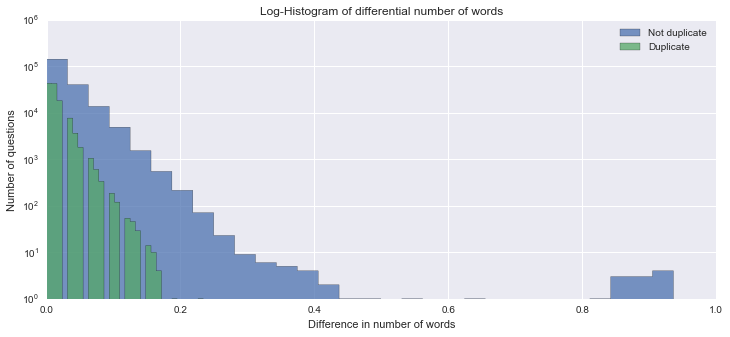

In [22]:
### Visualisation - plot histogram showing how distrubtion of differential number of words between both questions
### varies between duplicate and non-duplicate questions ###

# Histogram plotting techniques inspired by:
# https://www.kaggle.com/anokas/quora-question-pairs/data-analysis-xgboost-starter-0-35460-lb

plt.figure(figsize=(12, 5))
plt.hist(X_train["diff_num_words"][y_train == 0], bins=30, histtype="stepfilled", alpha = 0.75, label="Not duplicate")
plt.hist(X_train["diff_num_words"][y_train == 1], bins=30, histtype="stepfilled", alpha = 0.75, label="Duplicate")
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of differential number of words')
plt.xlabel('Difference in number of words')
plt.ylabel('Number of questions')
plt.legend()
print

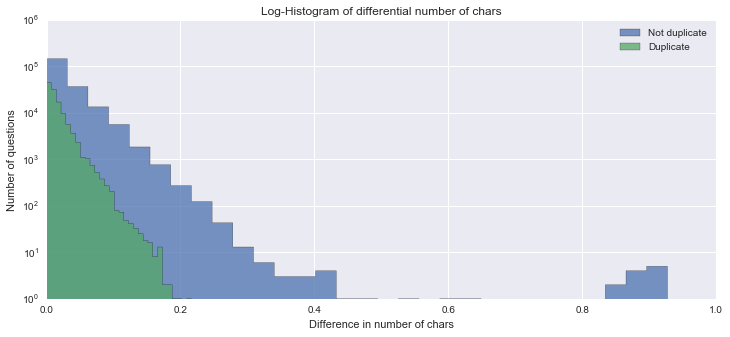

In [23]:
### Visualisation - plot histogram showing how distrubtion of differential number of chars between both questions
### varies between duplicate and non-duplicate questions ###

plt.figure(figsize=(12, 5))
plt.hist(X_train["diff_num_chars"][y_train == 0], bins=30, histtype="stepfilled", alpha = 0.75,label= "Not duplicate")
plt.hist(X_train["diff_num_chars"][y_train == 1], bins=30, histtype="stepfilled", alpha = 0.75, label="Duplicate")
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of differential number of chars')
plt.xlabel('Difference in number of chars')
plt.ylabel('Number of questions')
plt.legend()
print

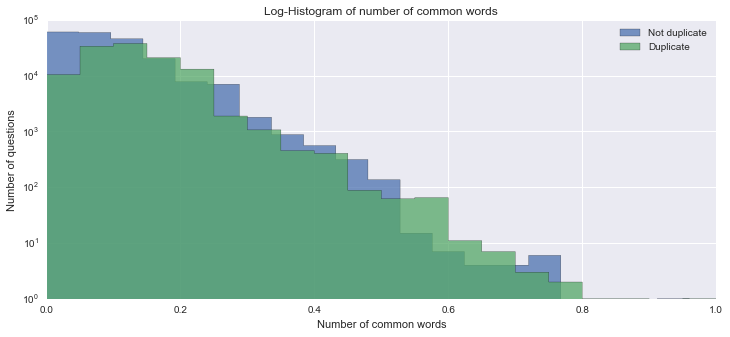

In [24]:
### Visualisation - plot histogram showing how distrubtion of number of common words between both questions
### varies between duplicate and non-duplicate questions ###

plt.figure(figsize=(12, 5))
plt.hist(X_train["num_common_words"][y_train == 0], bins=20, histtype="stepfilled", alpha = 0.75, label="Not duplicate")
plt.hist(X_train["num_common_words"][y_train == 1], bins=20, histtype="stepfilled", alpha = 0.75, label="Duplicate")
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of number of common words')
plt.xlabel('Number of common words')
plt.ylabel('Number of questions')
plt.legend()
print

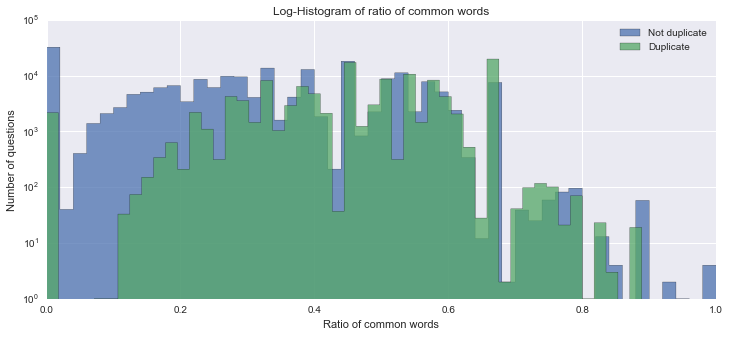

In [25]:
### Visualisation - plot histogram showing how distrubtion of ratio of common words between both questions
### varies between duplicate and non-duplicate questions ###

plt.figure(figsize=(12, 5))
plt.hist(X_train["ratio_common_words"][y_train == 0], bins=50, histtype="stepfilled", alpha = 0.75, label="Not duplicate")
plt.hist(X_train["ratio_common_words"][y_train == 1], bins=50, histtype="stepfilled", alpha = 0.75, label="Duplicate")
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of ratio of common words')
plt.xlabel('Ratio of common words')
plt.ylabel('Number of questions')
plt.legend()
print

In [26]:
from sklearn.metrics import log_loss

def performance_metric(y_true, y_predict):
    """ Calculate and return the performance score between true and predicted values based on the metric chosen. """
    
    # Calculate the performance score between 'y_true' and 'y_predict'  
    score = log_loss(y_true, y_predict)
    
    # Return the score
    return score

In [27]:
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import ShuffleSplit

def fit_model(X, y, verbose):
    """ Perform grid search over the 'max_depth' parameter for a decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    
    if verbose:
        print "DEBUG - making cv_sets"
    
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)
    
    if verbose:
        print "DEBUG - making regressor"
    
    if algorithm_choice == 0:    #Linear Regression
        regressor = LinearRegression()
        params = {'fit_intercept':(True, False)}
        
    elif algorithm_choice == 1:  #SVR
        regressor = svm.SVR()
        params = {'C': (1,10)}
        
    elif algorithm_choice == 2:  #Decision Tree
        regressor = DecisionTreeRegressor()
        params = {'max_depth':(10, None)}
        
    elif algorithm_choice == 3:  #Random Forest
        regressor = RandomForestRegressor(n_estimators = 20)
        params = {'max_depth':(10, None)}
        #params = {'max_depth':(2,5,10, None), 'min_samples_split':(1,2,3,4)} 
          

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    if verbose:
        print "DEBUG - making scorer"
    scoring_fnc = make_scorer(performance_metric)
    
    if verbose:
        print "DEBUG - starting gridsearch"
        print_freq = 1
    else:
        print_freq = 0
    # Create the grid search object
    grid = GridSearchCV(estimator = regressor, param_grid = params, scoring = scoring_fnc, cv = cv_sets, verbose = print_freq)
    
    if verbose:
        print "DEBUG - finished gridsearch, starting fit"
    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)
    
    if verbose:    
        print "DEBUG - finished fit"

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [28]:
#Remove unnecessary feature
X_train.drop(["diff_num_chars"], axis = 1, inplace = True)
X_test.drop(["diff_num_chars"], axis = 1, inplace = True)
X_train.drop(["num_common_words"], axis = 1, inplace = True)
X_test.drop(["num_common_words"], axis = 1, inplace = True)
print "Removed unwanted features"

/Users/Adam/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/Adam/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/Adam/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Removed unwanted features


/Users/Adam/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [29]:
if algorithm_choice != 4: #calculate test predictions (in case of any algorithms except XGBoost)

    # Fit the training data to the model using grid search

    print "DEBUG - calling fit_model"
    reg = fit_model(X_train, y_train, verbose = True)

    # Print the optimal model parameters
    print "Optimal model parameters: ", reg.get_params()
    
else:
    print "Skipping since using XGBoost"

DEBUG - calling fit_model
DEBUG - making cv_sets
DEBUG - making regressor
DEBUG - making scorer
DEBUG - starting gridsearch
DEBUG - finished gridsearch, starting fit
Fitting 10 folds for each of 2 candidates, totalling 20 fits
DEBUG - finished fit
Optimal model parameters:  {'warm_start': False, 'oob_score': False, 'n_jobs': 1, 'verbose': 0, 'max_leaf_nodes': None, 'bootstrap': True, 'min_samples_leaf': 1, 'n_estimators': 20, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'criterion': 'mse', 'random_state': None, 'max_features': 'auto', 'max_depth': None}


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   33.3s finished


In [30]:
if algorithm_choice != 4: #calculate test predictions (in case of any algorithms except XGBoost)
    display(X_test.head(10))
    preds_train = reg.predict(X_train)
    preds_test = reg.predict(X_test)
    #display(preds_train[:10])
    
    score_train = performance_metric(y_train, preds_train)
    score_test = performance_metric(y_test, preds_test)

    print "Score on training set:", score_train
    print "Score on testing set:", score_test
else:
    print "Skipping since using XGBoost"

,diff_num_words,ratio_common_words
225143,0.021277,0.166667
162274,0.010638,0.380952
217127,0.042553,0.000000
394527,0.010638,0.533333
55570,0.010638,0.444444
67848,0.000000,0.583333
325138,0.000000,0.333333
146588,0.000000,0.000000
236711,0.000000,0.666667
211378,0.010638,0.592593


Score on training set: 0.53891923976
Score on testing set: 0.548774564332


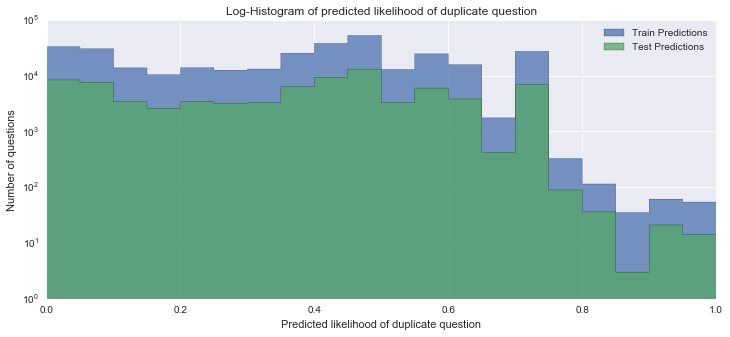

In [31]:
### Free-form Visualisation - See the distribution of predictions

if algorithm_choice != 4: #calculate test predictions (in case of any algorithms except XGBoost)
    plt.figure(figsize=(12, 5))
    plt.hist(preds_train, bins=20, histtype="stepfilled", alpha = 0.75, label="Train Predictions")
    plt.hist(preds_test, bins=20, histtype="stepfilled", alpha = 0.75, label="Test Predictions")
    plt.yscale('log', nonposy='clip')
    plt.title('Log-Histogram of predicted likelihood of duplicate question')
    plt.xlabel('Predicted likelihood of duplicate question')
    plt.ylabel('Number of questions')
    plt.legend()
else:
    print "Skipping since using XGBoost"

In [32]:
### Sensitivity Analysis
# Inspired by the 'Predict Trials' function used as part of the Boston Housing Project

if algorithm_choice != 4: #calculate test predictions (in case of any algorithms except XGBoost)
    scores = []
    iterations = 10
    for n in range(iterations):
        X_train_sns, X_test_sns, y_train_sns, y_test_sns = train_test_split(features_scaled, results, test_size = 0.2, random_state = 10*n)
        X_train_sns.drop(["diff_num_chars"], axis = 1, inplace = True)
        X_test_sns.drop(["diff_num_chars"], axis = 1, inplace = True)
        X_train_sns.drop(["num_common_words"], axis = 1, inplace = True)
        X_test_sns.drop(["num_common_words"], axis = 1, inplace = True)
        
        reg_sns = fit_model(X_train_sns, y_train_sns, verbose = False)
        preds_sns = reg.predict(X_test_sns)
        score_sns = performance_metric(y_test_sns, preds_sns)
        scores.append(score_sns)
        
    print scores
    print "Mean score across", iterations, "iterations:", np.average(scores)
    print "Median score across", iterations, "iterations:", np.median(scores)
    print "Standard deviation across", iterations, "iterations:", np.std(scores)
        
else:
    print "Skipping since using XGBoost"

/Users/Adam/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Adam/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Adam/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


[0.5418078289724384, 0.54275538199877682, 0.53946216241677725, 0.53973305954589912, 0.54317678088026766, 0.54338257235564613, 0.54003558703923848, 0.54222310119447859, 0.54015019009465748, 0.539286423314431]
Mean score across 10 iterations: 0.541201308781
Median score across 10 iterations: 0.540979009534
Standard deviation across 10 iterations: 0.00154267302941


/Users/Adam/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [33]:
# Guidelines for using XGBoost from:
# https://www.kaggle.com/anokas/quora-question-pairs/data-analysis-xgboost-starter-0-35460-lb

import xgboost as xgb

if algorithm_choice == 4: #XGBoost
    params = {}
    params['objective'] = 'binary:logistic'
    params['eval_metric'] = 'logloss'
    params['eta'] = 0.02
    params['max_depth'] = 4

    d_train = xgb.DMatrix(X_train, label = y_train)
    d_valid = xgb.DMatrix(X_test, label = y_test)

    watchlist = [(d_train, 'training'), (d_valid, 'validation')]

    bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=100, verbose_eval=20)

else:
    print "Skipping since not using XGBoost"

Skipping since not using XGBoost


In [34]:
#Load the competition testing data set

try:
    test_data = pd.read_csv("test.csv")
    
    print "Quora duplicate questions competion test dataset has {} samples with {} features each.".format(*test_data.shape)
    
except:
    print "Dataset(s) could not be loaded. Please check filename is correct and dataset exists"

Quora duplicate questions competion test dataset has 2345796 samples with 3 features each.


In [35]:
#Pre-process competition test data in same was as training data
display(test_data.head())

test_data.fillna(value = "", axis = 0, inplace = True)

#Make all text lower case
test_data["question1"] = test_data["question1"].apply(to_lower_case)
test_data["question2"] = test_data["question2"].apply(to_lower_case)

#Remove punctuation
test_data["question1"] = test_data["question1"].apply(strip_punctuation)
test_data["question2"] = test_data["question2"].apply(strip_punctuation)

#Remove stop words
test_data["question1"] = test_data["question1"].apply(remove_stop_words)
test_data["question2"] = test_data["question2"].apply(remove_stop_words)

#Stem all words
test_data["question1"] = test_data["question1"].apply(stem_words)
test_data["question2"] = test_data["question2"].apply(stem_words)

test_data_features = pd.DataFrame()
test_data_features["diff_num_chars"] = test_data.apply(diff_num_chars, axis=1)
test_data_features["diff_num_words"] = test_data.apply(diff_num_words, axis=1)
test_data_features["num_common_words"] = test_data.apply(num_common_words, axis=1)
test_data_features["ratio_common_words"] = test_data.apply(ratio_common_words, axis=1)

display(test_data_features.head())

#min_max_scaler = preprocessing.MinMaxScaler()
feature_list = ["diff_num_chars", "diff_num_words", "num_common_words", "ratio_common_words"]

test_scaled_data = min_max_scaler.transform(test_data_features[feature_list])

test_features_scaled = pd.DataFrame(data = test_scaled_data, columns=feature_list)
display(test_features_scaled.head())

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


/Users/Adam/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


,diff_num_chars,diff_num_words,num_common_words,ratio_common_words
0,21,4,4,0.222222
1,4,0,3,0.300000
2,9,2,3,0.375000
3,4,0,1,0.250000
4,12,1,2,0.400000


,diff_num_chars,diff_num_words,num_common_words,ratio_common_words
0,0.039179,0.042553,0.16,0.296296
1,0.007463,0.000000,0.12,0.400000
2,0.016791,0.021277,0.12,0.500000
3,0.007463,0.000000,0.04,0.333333
4,0.022388,0.010638,0.08,0.533333


In [36]:
#Remove unnecessary feature
#test_data_features.drop(["diff_num_chars"], axis = 1, inplace = True)
#test_data_features.drop(["num_common_words"], axis = 1, inplace = True)
test_features_scaled.drop(["diff_num_chars"], axis = 1, inplace = True)
test_features_scaled.drop(["num_common_words"], axis = 1, inplace = True)
print "Removed unwanted features"

Removed unwanted features


In [37]:
if algorithm_choice == 4: #XGBoost
    d_test = xgb.DMatrix(test_features_scaled)
    test_predictions = bst.predict(d_test)
else:  #Scikit-learn
    test_predictions = reg.predict(test_features_scaled)

final_output = pd.concat([test_data["test_id"], pd.Series(test_predictions, name = "is_duplicate")], axis=1)

#print "Final output has {} samples with {} features each.".format(*final_output.shape)

display(final_output.head())

,test_id,is_duplicate
0,0,0.315160
1,1,0.461267
2,2,0.583347
3,3,0.389794
4,4,0.472888


In [38]:
final_output.to_csv("final_output.csv", index = False)
print "Final predictions written to final_output.csv successfully"

Final predictions written to final_output.csv successfully
